# **Importing the necessary libraries and dataset.**


In [106]:
import pandas as pd
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
df= pd.read_csv('Titanic-Dataset.csv')

# **Exploring the dataset by understanding features, datatypes, missing values, shape.**



In [107]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [110]:
df.shape

(891, 12)

In [111]:
df.isnull().sum()



,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

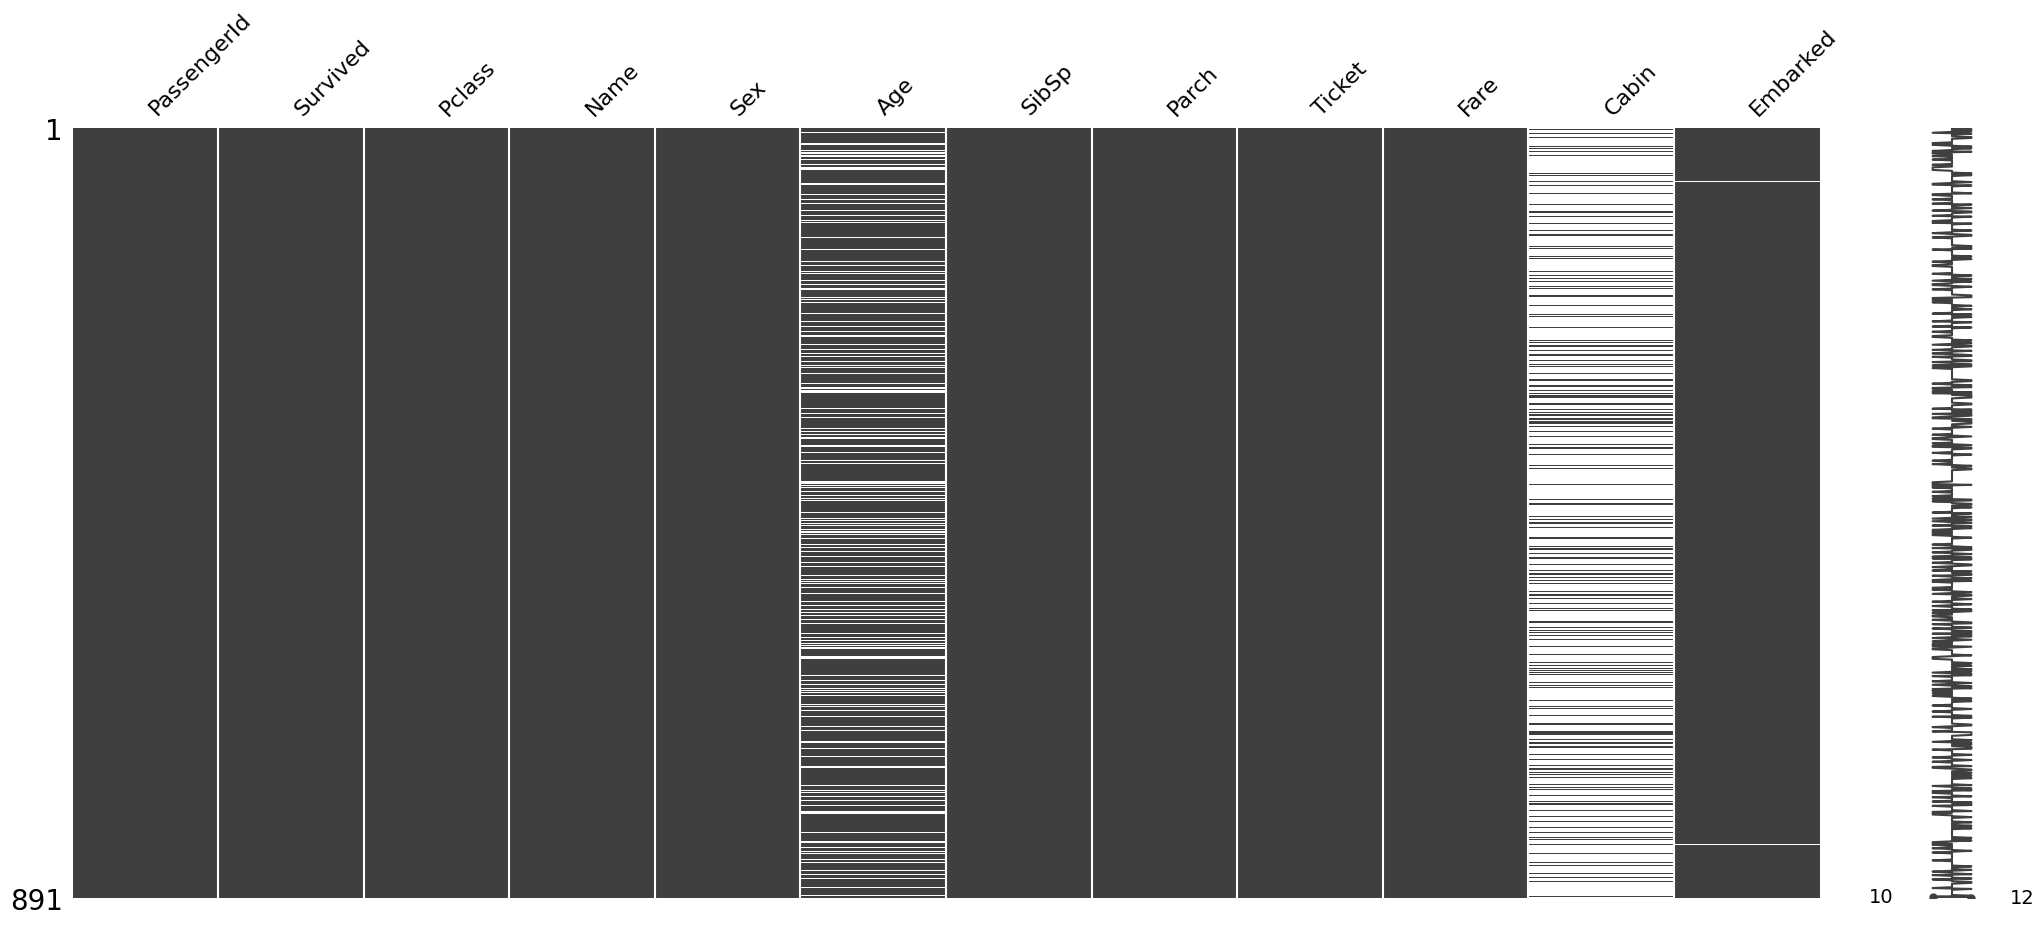

In [112]:
msno.matrix(df)

# **Handling numeric and categorical missing values by imputation(mean, label encoding, replacing with a string).**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


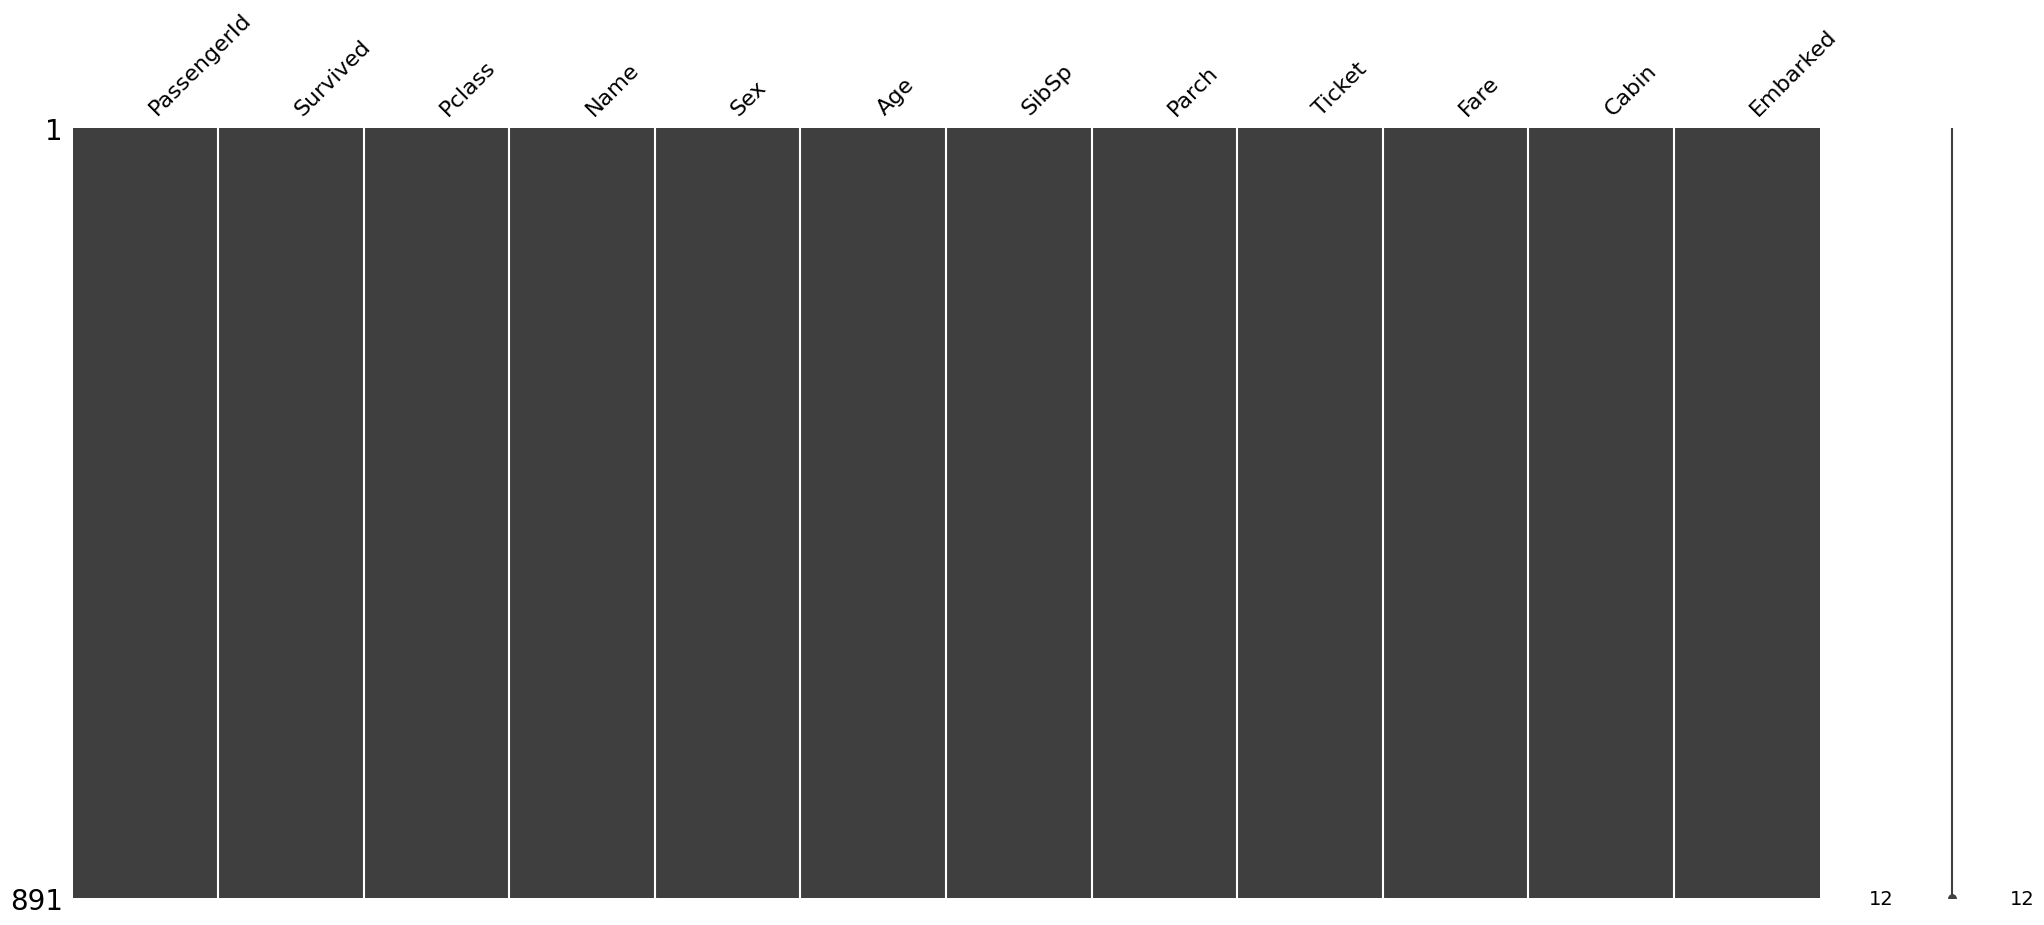

In [113]:
# Handling missing values in numerical features, here, 'Age' using mean imputation
imputer_mean = SimpleImputer(strategy='mean')
df['Age'] = imputer_mean.fit_transform(df[['Age']])

# Handling missing values in 'Embarked' by converting categorical features into numerical features using Label Encoding or replace with a string
categorical_cols = ['Embarked']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
# df['Embarked'].fillna('UNKNOWN', inplace=True)


# Handling missing values in Cabin by replacing null with string "UNKNOWN" or else drop the column
df.loc[df['Cabin'].isnull(), 'Cabin']='UNKNOWN'
# df.drop('Cabin', axis=1, inplace=True)


# Display the updated dataFrame info
df.info()

# Visualizing the missing values again
msno.matrix(df)
plt.show()

# **Standardizing numerical features.**

In [114]:
numerical_features = ['Age', 'Fare']  # Add numerical columns that needs to be normalized for e.g I have taken 'Age' and 'Fare'

# Assigning StandardScaler to the var scaler
scaler = StandardScaler()

# Transforming the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the updated DataFrame
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.592481,1,0,A/5 21171,-0.502445,UNKNOWN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,1,0,PC 17599,0.786845,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.284663,0,0,STON/O2. 3101282,-0.488854,UNKNOWN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,1,0,113803,0.420730,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,0.407926,0,0,373450,-0.486337,UNKNOWN,2


# **Using boxplots for displaying and removing potential outliers.**

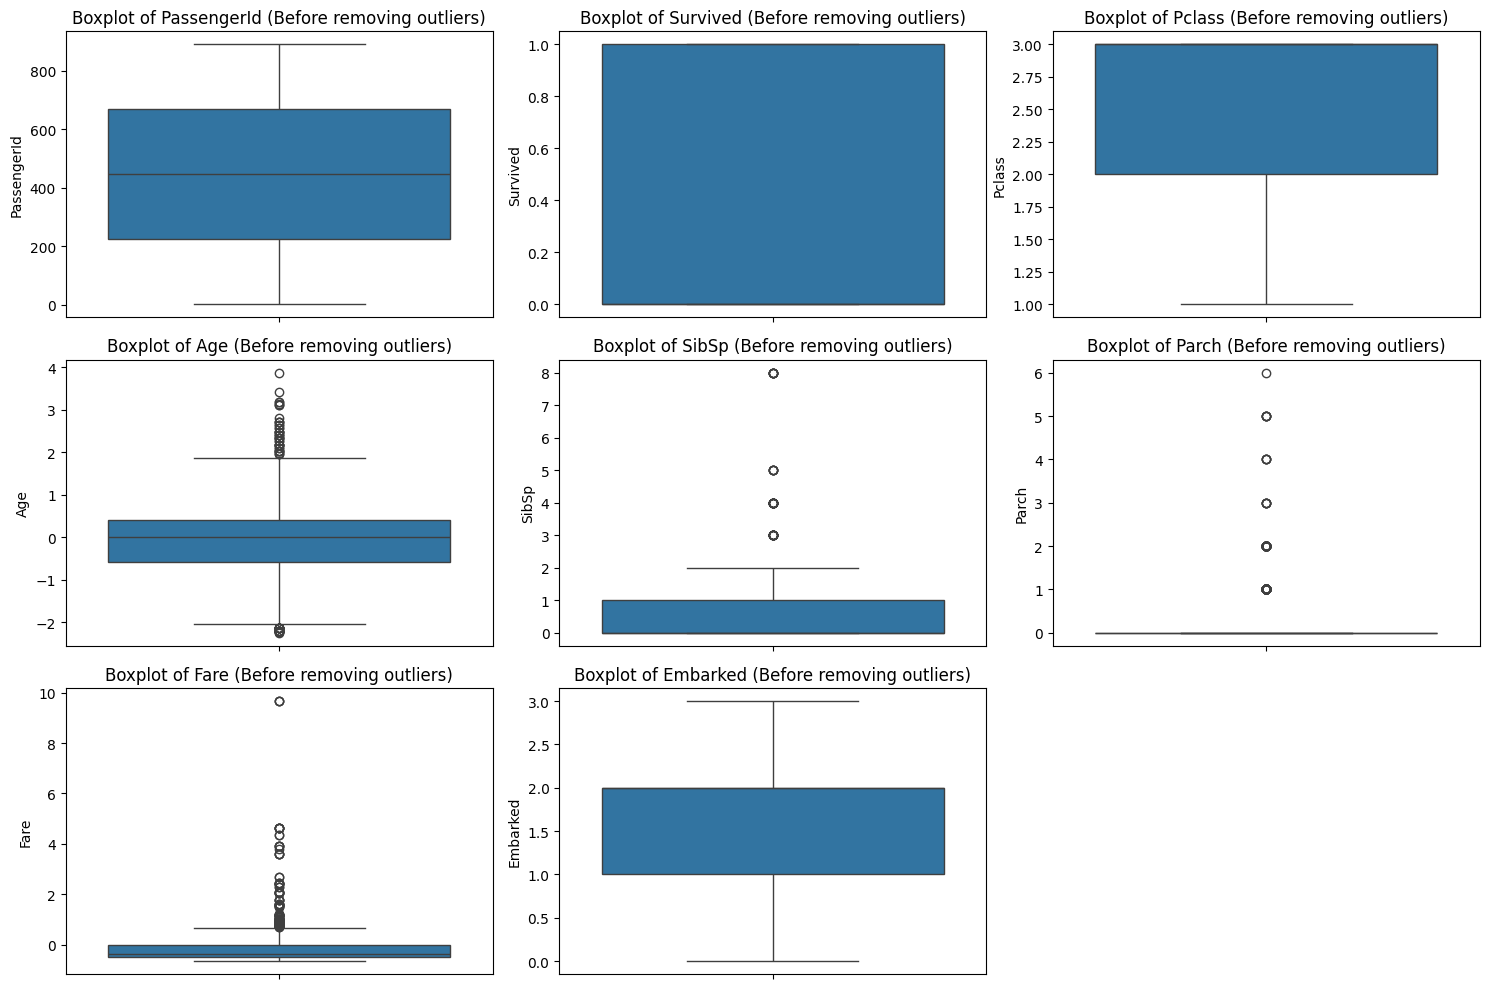

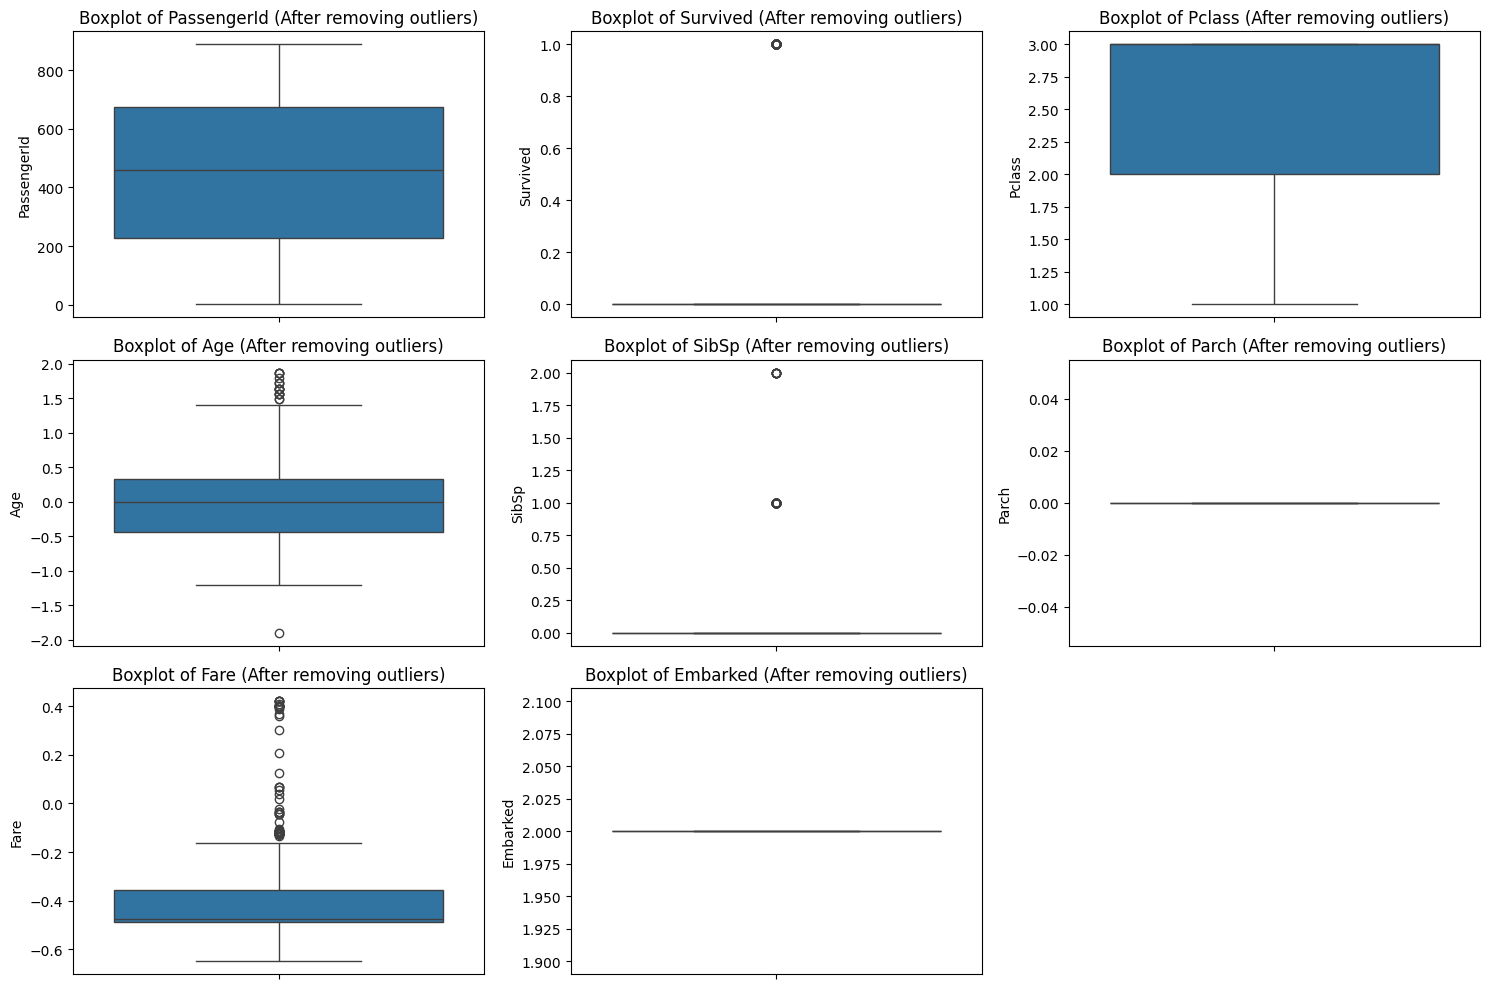

In [115]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_filtered

# Creating boxplots before removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):  # Checking for numeric columns only
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (Before removing outliers)')

plt.tight_layout()
plt.show()

# Remove outliers from each numeric column
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers(df, col)


# Create boxplots after removing outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (After removing outliers)')

plt.tight_layout()
plt.show()
